In [5]:
import pandas as pd

file_path = "/Users/cicisofia/Desktop/Springboard/Fashion(Data Points) - Form responses 1.csv"

df = pd.read_csv(file_path)

df.head()


,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21/01/2025 22:13:55,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21/01/2025 22:24:31,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21/01/2025 22:25:53,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21/01/2025 22:38:46,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN


In [7]:
df.shape

(150, 20)

In [9]:
# Check column names
df.columns

# Check data types and nulls
df.info()

df.describe(include='all')

df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Timestamp                                                                                       150 non-null    object 
 1     1.Age Group                                                                                   150 non-null    object 
 2     2.Gender                                                                                      150 non-null    object 
 3     3.Profession                                                                                  150 non-null    object 
 4   Section 2: Style Preferences
4. How would you describe your go-to daily outfit? (Select one)    149 non-null    object 
 5    5. What’s your

Timestamp                                                                                          149
  1.Age Group                                                                                        5
  2.Gender                                                                                           2
  3.Profession                                                                                       4
Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)        6
 5. What’s your favorite color palette for clothing?                                                 5
 6. Do you prioritize functionality or aesthetics in your outfits?                                   5
  7.Which of these best describes your wardrobe?                                                     3
Section 3: Shopping Habits\n8. How often do you shop for new clothes?                                4
  9.What influences your clothing purchases the most?                    

In [25]:
# ==== CLEAN RESET + BEHAVIOR SEGMENTS (run this cell) ====
import re, numpy as np, pandas as pd

# 0) start from your current df
df_raw = df.copy()

# 1) normalize headers (trim, remove newlines, collapse spaces)
df_raw.columns = (
    df_raw.columns
         .str.strip()
         .str.replace("\n", " ", regex=False)
         .str.replace(r"\s+", " ", regex=True)
)

# 2) drop all-empty junk + Timestamp if present
drop_cols = [c for c in ["Section 2: Style Preferences", "Column 18", "Timestamp"] if c in df_raw.columns]
df_clean = df_raw.drop(columns=drop_cols, errors="ignore").copy()

# 3) fuzzy match helper to find real column names
def find_col(cols, *needles):
    for c in cols:
        s = c.lower()
        if all(n.lower() in s for n in needles):
            return c
    return None

cols = list(df_clean.columns)

# 4) discover the important columns via fuzzy keywords
col_map_src = {
    "Satisfaction": (
        find_col(cols, "1-10") or
        find_col(cols, "1–10") or
        find_col(cols, "reflect", "personality") or
        find_col(cols, "scale", "personality")
    ),
    "AgeGroup": find_col(cols, "age", "group") or find_col(cols, "age"),
    "Gender": find_col(cols, "gender"),
    "Profession": find_col(cols, "profession"),
    "OutfitType": (
        find_col(cols, "go-to", "outfit") or
        find_col(cols, "describe", "outfit") or
        find_col(cols, "outfit")
    ),
    "ColorPalette": find_col(cols, "favorite", "color", "palette"),
    "FunctionVsAesthetic": find_col(cols, "functionality") or find_col(cols, "aesthetics"),
    "Wardrobe": find_col(cols, "which of these best describes your wardrobe") or find_col(cols, "wardrobe"),
    "ShoppingFrequency": find_col(cols, "how often", "shop", "clothes"),
    "PurchaseInfluence": find_col(cols, "influences", "purchases"),
    "ShoppingLocation": find_col(cols, "where do you typically shop"),
    "FormalEvents": find_col(cols, "how often", "formal"),
    "ExperimentNewStyles": find_col(cols, "experiment", "styles"),
    "Footwear": find_col(cols, "footwear"),
    "ActivityLevel": find_col(cols, "how active", "lifestyle"),
    "ComfortImportance": find_col(cols, "comfort", "choices"),
    "TimelessVsTrendy": find_col(cols, "timeless", "trendy"),
}

# 5) build rename map only for found columns
rename_map = {v: k for k, v in col_map_src.items() if v is not None}
df_clean = df_clean.rename(columns=rename_map)

# 6) coerce Satisfaction numeric
if "Satisfaction" not in df_clean.columns:
    raise KeyError("Couldn't auto-detect the Satisfaction column. Print df_clean.columns and adjust the fuzzy finder above.")
df_clean["Satisfaction"] = pd.to_numeric(df_clean["Satisfaction"], errors="coerce")

# 7) make satisfaction segments (Low ≤4, Medium 5–6, High ≥7)
df_clean["SatisfactionSegment"] = pd.cut(
    df_clean["Satisfaction"],
    bins=[-np.inf, 4, 6, np.inf],
    labels=["Low (≤4)", "Medium (5–6)", "High (≥7)"]
)

# 8) sanity check: show which key cols were found
print("Resolved columns:")
for k in sorted(rename_map.keys()):
    v = [kk for kk, vv in col_map_src.items() if vv == k]
    # v is the new name list (length 1 typically)
    print(f"  {v[0] if v else '?':<22}  <-  {k}")
print()

# 9) behavior tables: OutfitType & ShoppingFrequency by segment
def crosstab_counts_pct(df, left, top):
    if left not in df.columns or top not in df.columns:
        return None, None
    ct = pd.crosstab(df[left], df[top], dropna=False)
    pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)
    return ct, pct

outfit_ct, outfit_pct = crosstab_counts_pct(df_clean, "SatisfactionSegment", "OutfitType")
shop_ct, shop_pct     = crosstab_counts_pct(df_clean, "SatisfactionSegment", "ShoppingFrequency")
ward_ct, ward_pct     = crosstab_counts_pct(df_clean, "SatisfactionSegment", "Wardrobe")
func_ct, func_pct     = crosstab_counts_pct(df_clean, "SatisfactionSegment", "FunctionVsAesthetic")
comp_ct, comp_pct     = crosstab_counts_pct(df_clean, "SatisfactionSegment", "ComfortImportance")

# 10) display what we got (will be None if that column wasn't present)
tables = {
    "OutfitType": (outfit_ct, outfit_pct),
    "ShoppingFrequency": (shop_ct, shop_pct),
    "Wardrobe": (ward_ct, ward_pct),
    "FunctionVsAesthetic": (func_ct, func_pct),
    "ComfortImportance": (comp_ct, comp_pct),
}

for name, (ct, pct) in tables.items():
    if ct is not None:
        print(f"\n=== {name} by SatisfactionSegment — COUNTS ===")
        display(ct)
        print(f"=== {name} by SatisfactionSegment — ROW % ===")
        display(pct)

# 11) OPTIONAL: handle multi-select "ShoppingLocation" (split on commas)
if "ShoppingLocation" in df_clean.columns:
    loc_long = (
        df_clean[["SatisfactionSegment", "ShoppingLocation"]]
          .dropna()
          .assign(ShoppingLocation=lambda d: d["ShoppingLocation"].astype(str).str.split(","))
          .explode("ShoppingLocation")
          .assign(ShoppingLocation=lambda d: d["ShoppingLocation"].str.strip())
    )
    loc_ct = pd.crosstab(loc_long["SatisfactionSegment"], loc_long["ShoppingLocation"], dropna=False)
    loc_pct = (loc_ct.div(loc_ct.sum(axis=1), axis=0) * 100).round(1)
    print("\n=== ShoppingLocation by SatisfactionSegment — COUNTS ===")
    display(loc_ct)
    print("=== ShoppingLocation by SatisfactionSegment — ROW % ===")
    display(loc_pct)

# 12) df_clean is your canonical, cleaned DataFrame from here on
print("\nFinal df_clean shape:", df_clean.shape)


Resolved columns:
  ShoppingLocation        <-  10. Where do you typically shop for clothes? (Select all that apply)
  ExperimentNewStyles     <-  12.Do you often experiment with new styles or stick to what you know?
  Footwear                <-  13. What kind of footwear do you wear most often?
  ActivityLevel           <-  14. How active is your daily lifestyle?
  TimelessVsTrendy        <-  16.If you had to choose, would you prefer timeless pieces or trendy items?
  ColorPalette            <-  5. What’s your favorite color palette for clothing?
  FunctionVsAesthetic     <-  6. Do you prioritize functionality or aesthetics in your outfits?
  Wardrobe                <-  7.Which of these best describes your wardrobe?
  PurchaseInfluence       <-  9.What influences your clothing purchases the most?
  AgeGroup                <-  AgeGroup
  Gender                  <-  Gender
  OutfitType              <-  OutfitType
  Profession              <-  Profession
  ShoppingFrequency       <-  Sec

OutfitType,"Bohemian (e.g., flowy, patterned)","Casual (e.g., jeans, t-shirts)","Chic (e.g., tailored, stylish)","Formal (e.g., suits, dresses)","Sporty (e.g., activewear, sneakers)","Trendy (e.g., bold, experimental)"
SatisfactionSegment,,,,,,
Low (≤4),0,6,0,2,0,0
Medium (5–6),0,18,0,0,5,0
High (≥7),1,84,4,11,12,3


=== OutfitType by SatisfactionSegment — ROW % ===


OutfitType,"Bohemian (e.g., flowy, patterned)","Casual (e.g., jeans, t-shirts)","Chic (e.g., tailored, stylish)","Formal (e.g., suits, dresses)","Sporty (e.g., activewear, sneakers)","Trendy (e.g., bold, experimental)"
SatisfactionSegment,,,,,,
Low (≤4),0.0,75.0,0.0,25.0,0.0,0.0
Medium (5–6),0.0,78.3,0.0,0.0,21.7,0.0
High (≥7),0.9,73.0,3.5,9.6,10.4,2.6



=== ShoppingFrequency by SatisfactionSegment — COUNTS ===


ShoppingFrequency,Every few months,Monthly,Rarely,Weekly
SatisfactionSegment,,,,
Low (≤4),3,1,3,1
Medium (5–6),10,5,8,0
High (≥7),56,25,27,8


=== ShoppingFrequency by SatisfactionSegment — ROW % ===


ShoppingFrequency,Every few months,Monthly,Rarely,Weekly
SatisfactionSegment,,,,
Low (≤4),37.5,12.5,37.5,12.5
Medium (5–6),43.5,21.7,34.8,0.0
High (≥7),48.3,21.6,23.3,6.9



=== Wardrobe by SatisfactionSegment — COUNTS ===


Wardrobe,Minimalist (few versatile pieces),Mix-and-match (varied styles),Specialized (specific to one style)
SatisfactionSegment,,,
Low (≤4),3,5,0
Medium (5–6),10,9,3
High (≥7),40,67,9


=== Wardrobe by SatisfactionSegment — ROW % ===


Wardrobe,Minimalist (few versatile pieces),Mix-and-match (varied styles),Specialized (specific to one style)
SatisfactionSegment,,,
Low (≤4),37.5,62.5,0.0
Medium (5–6),45.5,40.9,13.6
High (≥7),34.5,57.8,7.8



=== FunctionVsAesthetic by SatisfactionSegment — COUNTS ===


FunctionVsAesthetic,Equal balance of both,Slightly prefer aesthetics,Slightly prefer functionality,Strongly prefer aesthetics,Strongly prefer functionality
SatisfactionSegment,,,,,
Low (≤4),5,1,0,0,2
Medium (5–6),9,3,6,0,5
High (≥7),74,11,14,3,14


=== FunctionVsAesthetic by SatisfactionSegment — ROW % ===


FunctionVsAesthetic,Equal balance of both,Slightly prefer aesthetics,Slightly prefer functionality,Strongly prefer aesthetics,Strongly prefer functionality
SatisfactionSegment,,,,,
Low (≤4),62.5,12.5,0.0,0.0,25.0
Medium (5–6),39.1,13.0,26.1,0.0,21.7
High (≥7),63.8,9.5,12.1,2.6,12.1



=== ComfortImportance by SatisfactionSegment — COUNTS ===


ComfortImportance,- Extremely important,- Neutral,- Not important at all,- Somewhat important,- Somewhat unimportant
SatisfactionSegment,,,,,
Low (≤4),3,1,0,4,0
Medium (5–6),13,2,1,6,1
High (≥7),54,17,0,43,2


=== ComfortImportance by SatisfactionSegment — ROW % ===


ComfortImportance,- Extremely important,- Neutral,- Not important at all,- Somewhat important,- Somewhat unimportant
SatisfactionSegment,,,,,
Low (≤4),37.5,12.5,0.0,50.0,0.0
Medium (5–6),56.5,8.7,4.3,26.1,4.3
High (≥7),46.6,14.7,0.0,37.1,1.7



=== ShoppingLocation by SatisfactionSegment — COUNTS ===


ShoppingLocation,Fast fashion stores,Local boutiques,Luxury brands,Online retailers,Thrift stores
SatisfactionSegment,,,,,
Low (≤4),5,2,0,1,0
Medium (5–6),3,6,1,9,4
High (≥7),35,23,17,29,12


=== ShoppingLocation by SatisfactionSegment — ROW % ===


ShoppingLocation,Fast fashion stores,Local boutiques,Luxury brands,Online retailers,Thrift stores
SatisfactionSegment,,,,,
Low (≤4),62.5,25.0,0.0,12.5,0.0
Medium (5–6),13.0,26.1,4.3,39.1,17.4
High (≥7),30.2,19.8,14.7,25.0,10.3



Final df_clean shape: (147, 18)


In [49]:
# === MODEL COMPARISON: Linear Regression vs Random Forest vs Gradient Boosting ===
import re, os, numpy as np, pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 0) Use the cleaned dataframe from your previous cell
base = "df_clean" if "df_clean" in globals() else "df"
data = globals().get(base)
if data is None:
    raise RuntimeError("Neither df_clean nor df exists. Run your cleaning cell first.")

# 1) Target
TARGET = "Satisfaction"
if TARGET not in data.columns:
    raise KeyError(f"Expected column '{TARGET}' not found in {base}.")
data = data.copy()
data[TARGET] = pd.to_numeric(data[TARGET], errors="coerce")
data = data.dropna(subset=[TARGET])

# 2) Expand multi-select column (ShoppingLocation) into binary flags if present
def expand_multiselect(df, col, sep=","):
    if col not in df.columns:
        return df
    long = df[[col]].dropna().astype(str)
    long = long.assign(**{col: long[col].str.split(sep)})
    long = long.explode(col)
    long[col] = long[col].str.strip()
    options = sorted([o for o in long[col].dropna().unique().tolist() if o != ""])
    import re
    for opt in options:
        safe = re.escape(opt)
        new_col = f"{col}__{opt}"
        df[new_col] = df[col].fillna("").astype(str).str.contains(rf"\b{safe}\b", case=False, regex=True).astype(int)
    return df.drop(columns=[col])

data = expand_multiselect(data, "ShoppingLocation")

# 3) Build feature matrix (drop target + helper columns if present)
drop_cols = [c for c in ["Satisfaction", "SatisfactionSegment", "dt", "weekday", "hour"] if c in data.columns]
X = data.drop(columns=drop_cols)
y = data[TARGET].values

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 5) Preprocessing
cat_sel = selector(dtype_include=["object", "category"])
num_sel = selector(dtype_include=np.number)
categorical_features = cat_sel(X_train)
numeric_features     = num_sel(X_train)

try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=True, with_std=True), numeric_features),
        ("cat", ohe, categorical_features),
    ],
    remainder="drop"
)

# 6) Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(learning_rate=0.05, n_estimators=600, max_depth=3, random_state=42),
}

# 7) Train/evaluate
rows = []
for name, est in models.items():
    pipe = Pipeline([("prep", preprocess), ("model", est)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    r2   = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae  = mean_absolute_error(y_test, y_pred)

    rows.append({"Model": name, "R²": round(r2, 3), "RMSE": round(rmse, 3), "MAE": round(mae, 3)})

cmp = pd.DataFrame(rows).sort_values(by="R²", ascending=False).reset_index(drop=True)

# 8) Save CSV
cmp.to_csv("model_comparison.csv", index=False)

# 9) Print a Markdown table (copy/paste into your report)
def to_markdown_table(df):
    headers = "| " + " | ".join(df.columns) + " |"
    sep     = "|" + "|".join(["---"] * len(df.columns)) + "|"
    rows_md = ["| " + " | ".join(str(x) for x in row) + " |" for row in df.values]
    return "\n".join([headers, sep] + rows_md)

print("=== Model Comparison (test set) ===")
from IPython.display import display
display(cmp)

print("\nMarkdown table for report:\n")
print(to_markdown_table(cmp))
print("\n[saved] model_comparison.csv")


=== Model Comparison (test set) ===


,Model,R²,RMSE,MAE
0,Random Forest Regressor,-2.100000e-02,1.637000e+00,1.231000e+00
1,Gradient Boosting,-5.540000e-01,2.019000e+00,1.632000e+00
2,Linear Regression,-2.927717e+22,2.771350e+11,5.059769e+10



Markdown table for report:

| Model | R² | RMSE | MAE |
|---|---|---|---|
| Random Forest Regressor | -0.021 | 1.637 | 1.231 |
| Gradient Boosting | -0.554 | 2.019 | 1.632 |
| Linear Regression | -2.9277174337575747e+22 | 277134962329.861 | 50597690115.792 |

[saved] model_comparison.csv


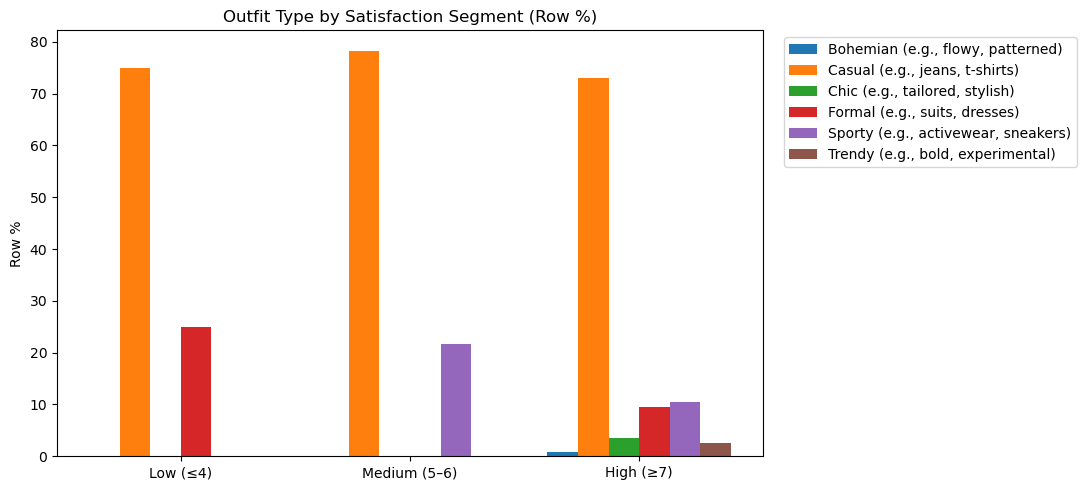

[saved] figures/fig_outfit_by_segment.png


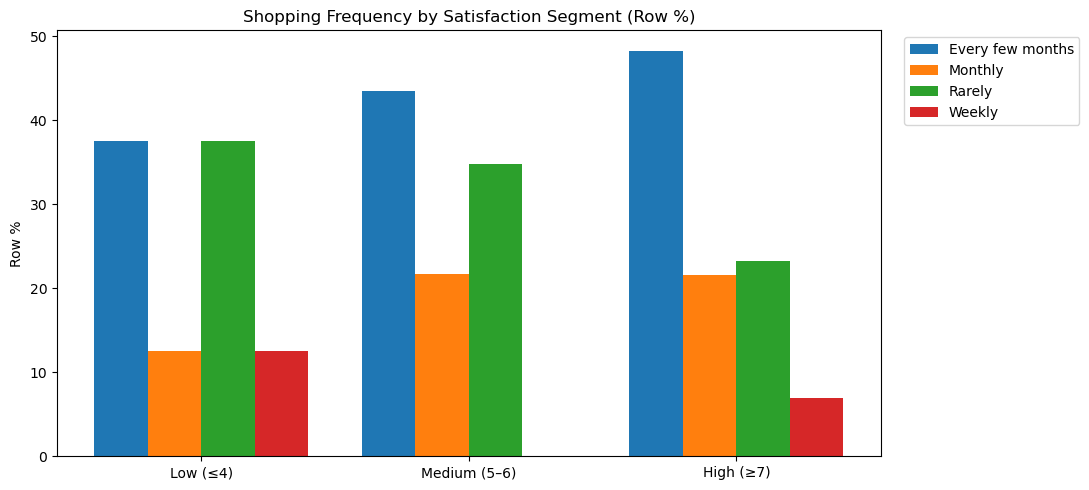

[saved] figures/fig_shoppingfreq_by_segment.png


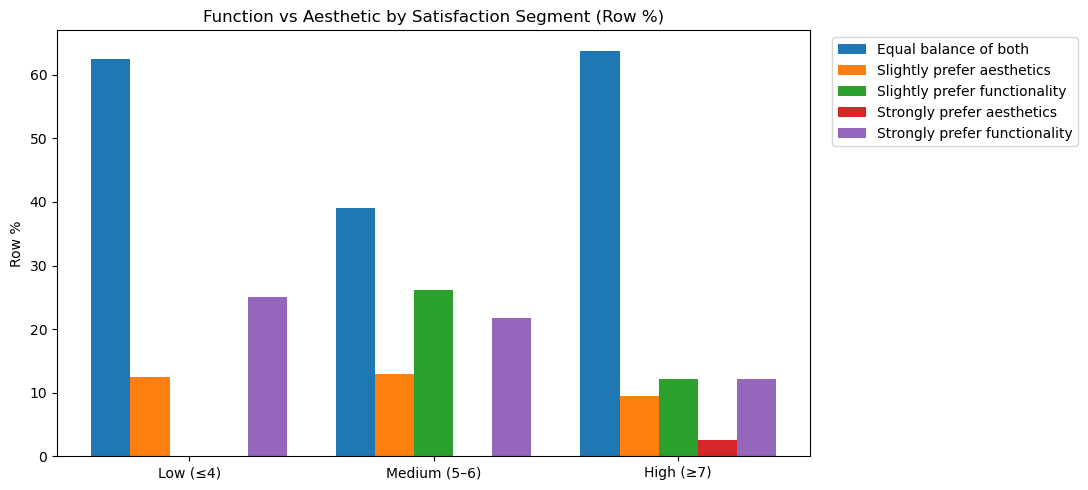

[saved] figures/fig_function_vs_aesthetic_by_segment.png


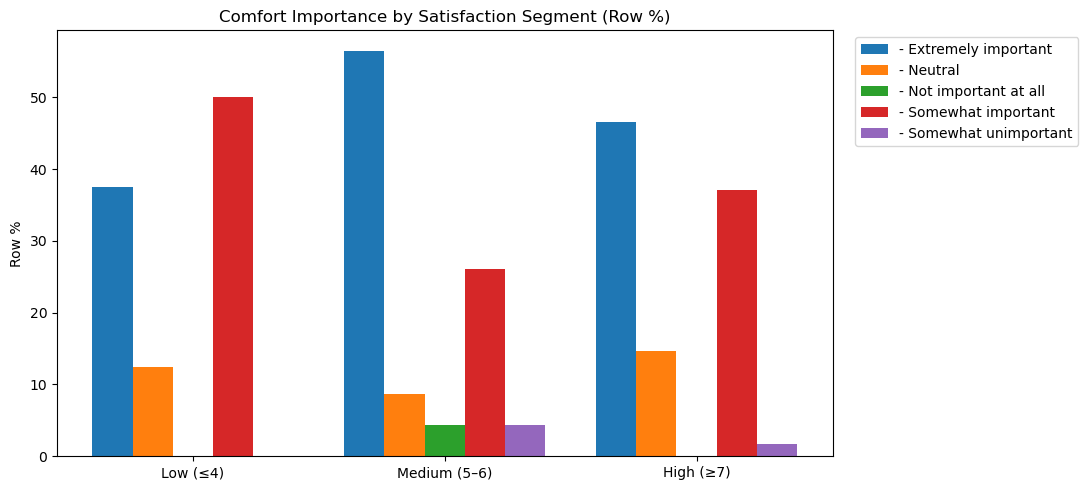

[saved] figures/fig_comfort_by_segment.png


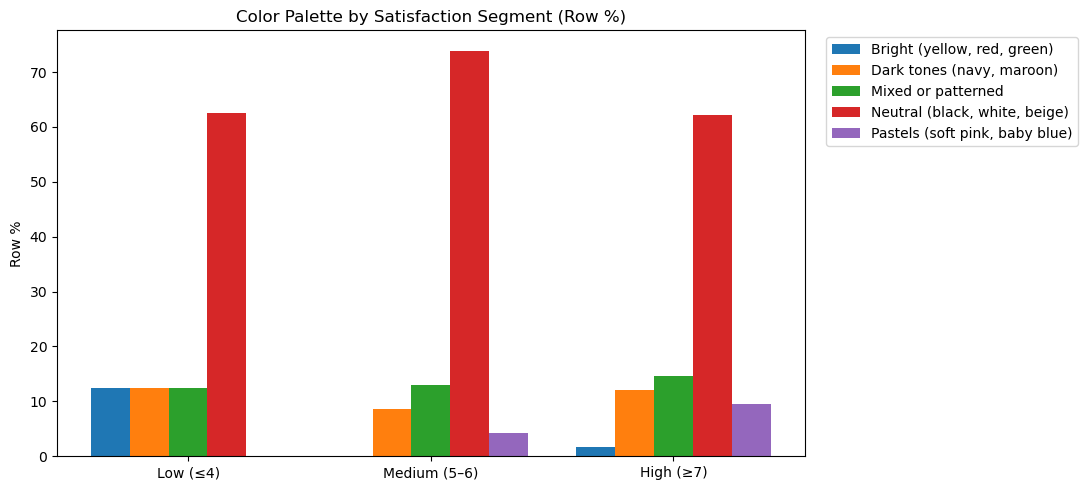

[saved] figures/fig_colorpalette_by_segment.png


In [35]:
# === BEHAVIOR PLOTS: show inline + save to figures/ ===
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt

# make sure the folder exists
os.makedirs("figures", exist_ok=True)

# 0) use the cleaned frame
base = "df_clean" if "df_clean" in globals() else "df"
_df = globals().get(base)
if _df is None:
    raise RuntimeError("Neither df_clean nor df exists. Run your cleaning cell first.")

# 1) helper: make crosstab (row %)
def make_ct(df, left, top):
    if left not in df.columns or top not in df.columns:
        return None, None
    ct = pd.crosstab(df[left], df[top], dropna=False)
    pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)
    return ct, pct

# build all relevant crosstabs
outfit_ct, outfit_pct = make_ct(_df, "SatisfactionSegment", "OutfitType")
shop_ct,   shop_pct   = make_ct(_df, "SatisfactionSegment", "ShoppingFrequency")
func_ct,   func_pct   = make_ct(_df, "SatisfactionSegment", "FunctionVsAesthetic")
comfort_ct, comfort_pct = make_ct(_df, "SatisfactionSegment", "ComfortImportance")
color_ct,  color_pct  = make_ct(_df, "SatisfactionSegment", "ColorPalette")

# 2) plotting helper: show + save
def plot_rowpct_bars(pct_df, title, filename):
    if pct_df is None or pct_df.empty:
        print(f"[skip] No data for {title}")
        return

    labels = pct_df.index.tolist()
    cats   = pct_df.columns.tolist()
    x = np.arange(len(labels))
    width = 0.8 / max(1, len(cats))

    plt.figure(figsize=(11,5))
    for i, c in enumerate(cats):
        plt.bar(x + i*width - (width*(len(cats)-1)/2), pct_df[c].values, width, label=str(c))

    plt.xticks(x, labels)
    plt.ylabel("Row %")
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()

    # show inline
    plt.show()

    # save to disk
    out_path = os.path.join("figures", filename)
    plt.savefig(out_path, dpi=200, bbox_inches="tight")
    plt.close()
    print(f"[saved] {out_path}")

# 3) run plots
plot_rowpct_bars(outfit_pct,   "Outfit Type by Satisfaction Segment (Row %)", "fig_outfit_by_segment.png")
plot_rowpct_bars(shop_pct,     "Shopping Frequency by Satisfaction Segment (Row %)", "fig_shoppingfreq_by_segment.png")
plot_rowpct_bars(func_pct,     "Function vs Aesthetic by Satisfaction Segment (Row %)", "fig_function_vs_aesthetic_by_segment.png")
plot_rowpct_bars(comfort_pct,  "Comfort Importance by Satisfaction Segment (Row %)", "fig_comfort_by_segment.png")
plot_rowpct_bars(color_pct,    "Color Palette by Satisfaction Segment (Row %)", "fig_colorpalette_by_segment.png")


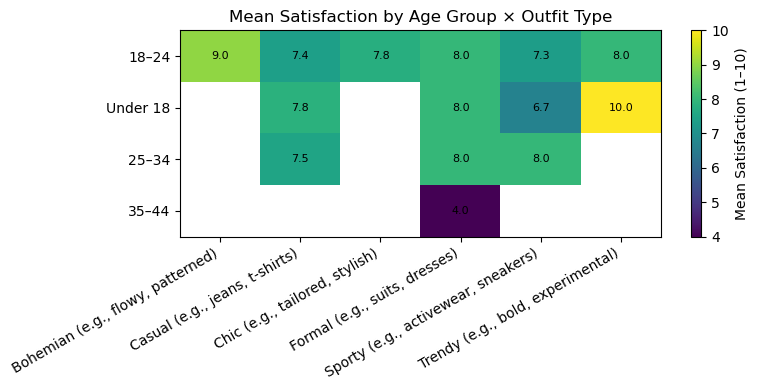

[saved] figures/fig_style_by_age_heatmap.png


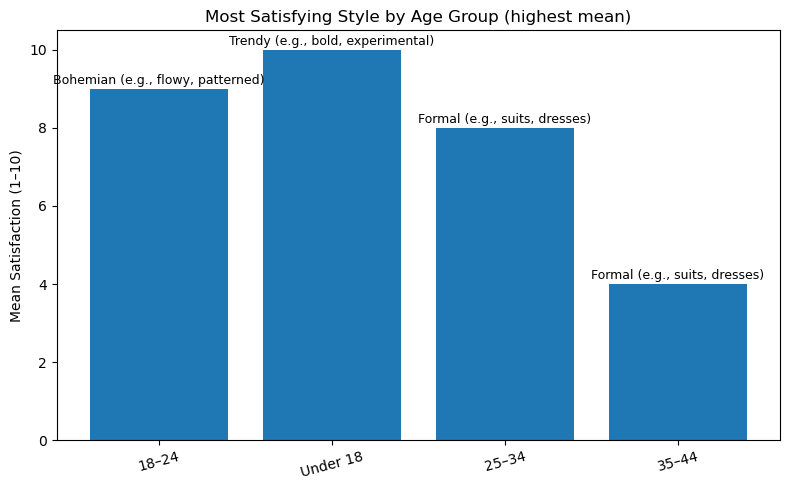

[saved] figures/fig_topstyle_by_age.png


In [37]:
# === MOST SATISFYING STYLES AT EACH AGE: heatmap + top-style bars ===
import os, re, numpy as np, pandas as pd
import matplotlib.pyplot as plt

# ensure folder for saving
os.makedirs("figures", exist_ok=True)

# pick the cleaned dataframe
base = "df_clean" if "df_clean" in globals() else "df"
_df = globals().get(base)
if _df is None:
    raise RuntimeError("Neither df_clean nor df exists. Run your cleaning cell first.")

needed = ["AgeGroup", "OutfitType", "Satisfaction"]
missing = [c for c in needed if c not in _df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}")

# prep data
d = _df[needed].dropna().copy()
d["Satisfaction"] = pd.to_numeric(d["Satisfaction"], errors="coerce")
d = d.dropna(subset=["Satisfaction"])

# order age groups numerically if possible
def age_key(x):
    m = re.search(r"\d+", str(x))
    return int(m.group()) if m else 10**9

age_order = sorted(d["AgeGroup"].unique().tolist(), key=age_key)
style_order = sorted(d["OutfitType"].unique().tolist())

# pivot table: mean satisfaction
mean_tbl = (
    d.groupby(["AgeGroup", "OutfitType"])["Satisfaction"]
     .mean()
     .unstack("OutfitType")
     .reindex(index=age_order, columns=style_order)
)

# -------- Plot 1: Heatmap --------
plt.figure(figsize=(max(8, 1.0*len(style_order)), max(4, 0.6*len(age_order))))
im = plt.imshow(mean_tbl.values, aspect="auto")
plt.colorbar(im, label="Mean Satisfaction (1–10)")
plt.xticks(ticks=np.arange(len(style_order)), labels=style_order, rotation=30, ha="right")
plt.yticks(ticks=np.arange(len(age_order)), labels=age_order)
plt.title("Mean Satisfaction by Age Group × Outfit Type")

# annotate with values
for i in range(mean_tbl.shape[0]):
    for j in range(mean_tbl.shape[1]):
        val = mean_tbl.values[i, j]
        if not np.isnan(val):
            plt.text(j, i, f"{val:.1f}", ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()
plt.savefig("figures/fig_style_by_age_heatmap.png", dpi=200, bbox_inches="tight")
plt.close()
print("[saved] figures/fig_style_by_age_heatmap.png")

# -------- Plot 2: Top style per AgeGroup --------
top_rows = []
for age in age_order:
    row = mean_tbl.loc[age]
    if row.notna().any():
        best_style = row.idxmax()
        best_val = row.max()
        top_rows.append((age, best_style, best_val))

top_df = pd.DataFrame(top_rows, columns=["AgeGroup", "TopStyle", "MeanSatisfaction"])

x = np.arange(len(top_df))
plt.figure(figsize=(max(8, 0.9*len(top_df)), 5))
plt.bar(x, top_df["MeanSatisfaction"].values)
plt.xticks(x, top_df["AgeGroup"].tolist(), rotation=15)
plt.ylabel("Mean Satisfaction (1–10)")
plt.title("Most Satisfying Style by Age Group (highest mean)")

# label bars
for i, (style, val) in enumerate(zip(top_df["TopStyle"], top_df["MeanSatisfaction"])):
    plt.text(i, val + 0.05, str(style), ha="center", va="bottom", fontsize=9)

plt.ylim(0, max(10, (top_df["MeanSatisfaction"].max() or 10) + 0.5))
plt.tight_layout()
plt.show()
plt.savefig("figures/fig_topstyle_by_age.png", dpi=200, bbox_inches="tight")
plt.close()
print("[saved] figures/fig_topstyle_by_age.png")


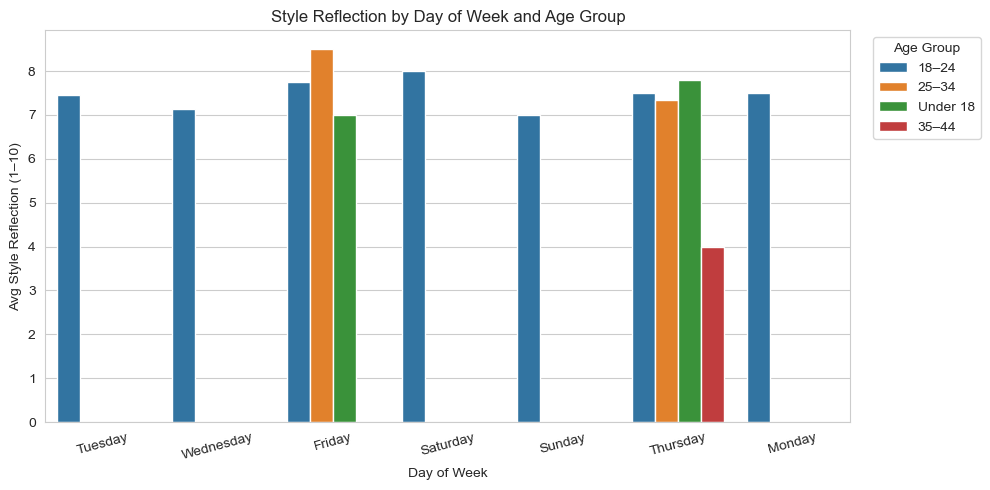

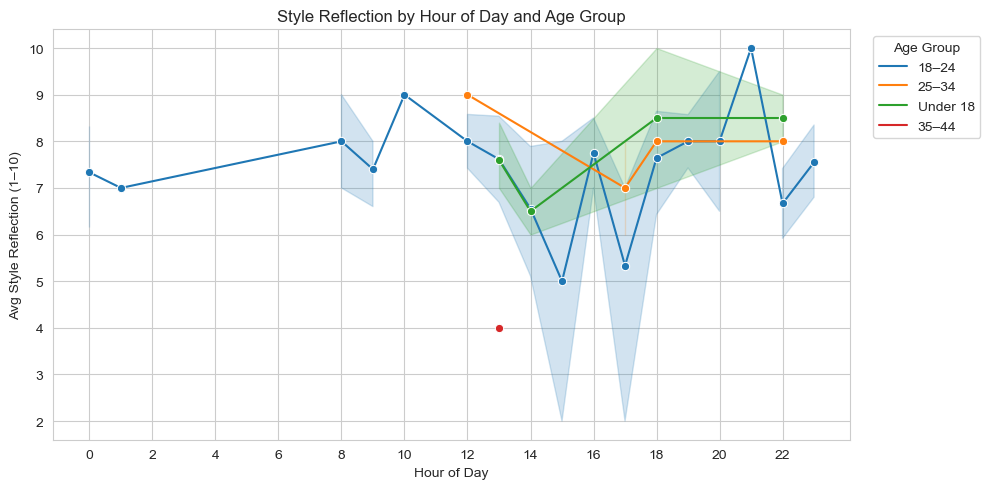

In [142]:

import seaborn as sns

import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# Step 1: Clean column names
df.columns = df.columns.str.strip().str.replace("\n", " ").str.replace("  ", " ")

# Step 2: Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Step 3: Rename columns
df.rename(columns={
    "17. From scale 1-10 how much do you think your clothing style reflects about your personality?": "style_reflection_score",
    "1.Age Group": "age_group"
}, inplace=True)

# Step 4: Assign with .loc to avoid warnings
df.loc[:, 'dt'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')
df.loc[:, 'weekday'] = df['dt'].dt.day_name()
df.loc[:, 'hour'] = df['dt'].dt.hour
df.loc[:, 'score'] = pd.to_numeric(df['style_reflection_score'], errors='coerce')

# Step 5: Drop rows with missing key values
required = ['age_group', 'weekday', 'hour', 'score']
plot_df = df.dropna(subset=required).copy()

# Step 6: Force weekday order
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plot_df.loc[:, 'weekday'] = pd.Categorical(plot_df['weekday'], categories=weekday_order, ordered=True)

# — PLOT A: Score by Day of Week —
plt.figure(figsize=(10,5))
sns.barplot(
    data=plot_df,
    x='weekday',
    y='score',
    hue='age_group',
    errorbar=None,
    estimator='mean'
)
plt.title('Style Reflection by Day of Week and Age Group')
plt.xlabel('Day of Week')
plt.ylabel('Avg Style Reflection (1–10)')
plt.xticks(rotation=15)
plt.legend(title='Age Group', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# — PLOT B: Score by Hour of Day —
plt.figure(figsize=(10,5))
sns.lineplot(
    data=plot_df,
    x='hour',
    y='score',
    hue='age_group',
    marker='o'
)
plt.title('Style Reflection by Hour of Day and Age Group')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Style Reflection (1–10)')
plt.xticks(range(0, 24, 2))
plt.legend(title='Age Group', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
# q: Do people who shop less rate their style as more reflective of their personality?

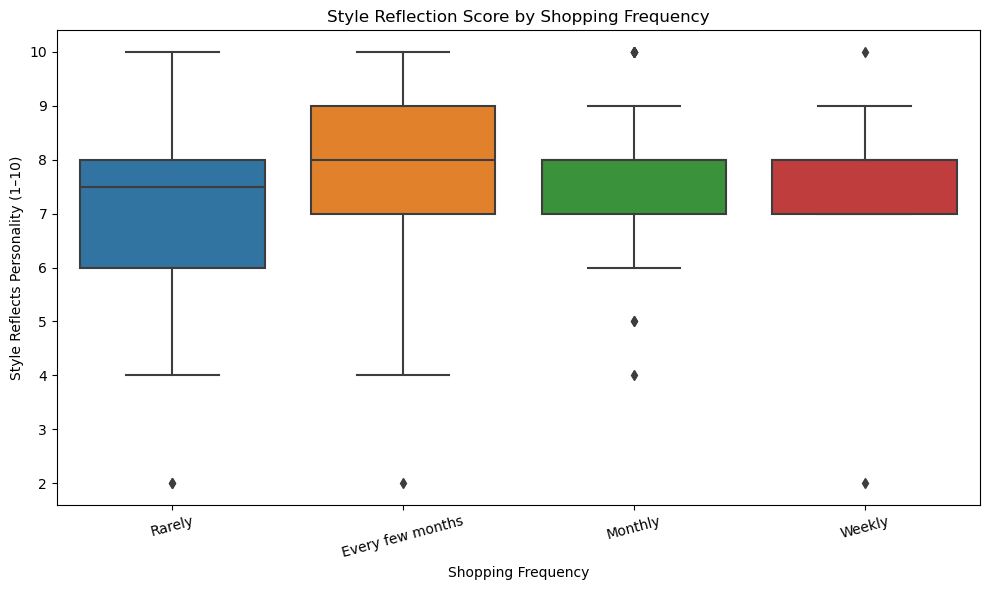

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x="shopping_freq", y="style_reflection_score", data=df)
plt.title("Style Reflection Score by Shopping Frequency")
plt.xlabel("Shopping Frequency")
plt.ylabel("Style Reflects Personality (1–10)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


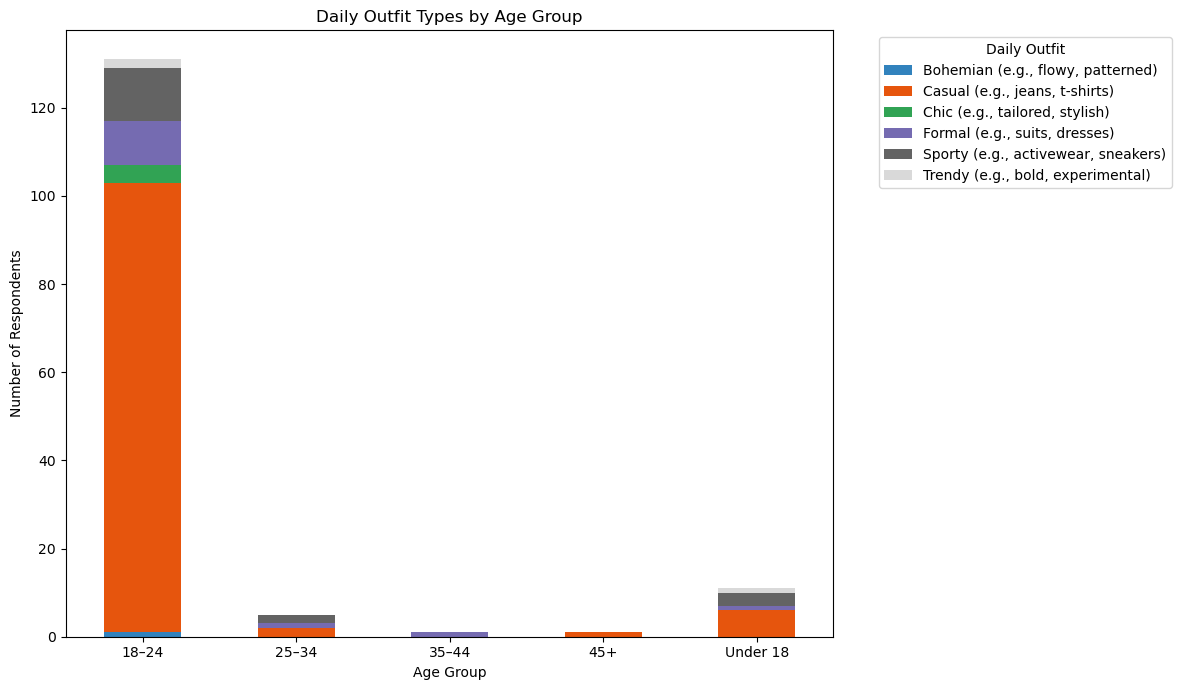

In [51]:

# Crosstab for daily outfit vs age group
outfit_by_age = pd.crosstab(df["age_group"], df["daily_outfit"])

# Plot
outfit_by_age.plot(kind="bar", stacked=True, figsize=(12, 7), colormap="tab20c")
plt.title("Daily Outfit Types by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)
plt.legend(title="Daily Outfit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [68]:
print("Comfort importance values:")
print(df["comfort_importance"].unique())

print("Style reflection scores:")
print(df["style_reflection_score"].unique())

print("Style experimentation:")
print(df["style_experimentation"].unique())

print("Footwear types:")
print(df["footwear"].unique())

print("Activity levels:")
print(df["activity_level"].unique())


Comfort importance values:
['- Extremely important' '- Somewhat important' '- Neutral'
 '- Somewhat unimportant' nan '- Not important at all']
Style reflection scores:
[ 8.  6.  9.  4. 10.  7. nan  2.  5.]
Style experimentation:
['Sometimes experiment' 'Rarely experiment' 'Always experiment' nan]
Footwear types:
['Sneakers' 'Sandals/Flats' 'Other' 'Boots' 'Heels/Loafers' nan]
Activity levels:
['Mostly sedentary' 'Moderately active'
 'Very active (e.g., gym, outdoor activities)' nan]


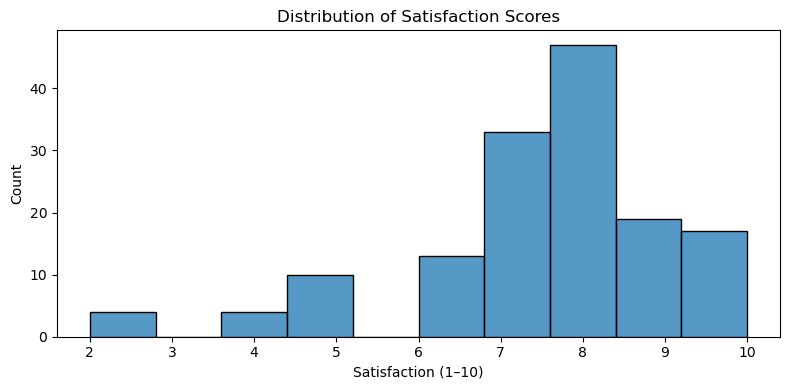

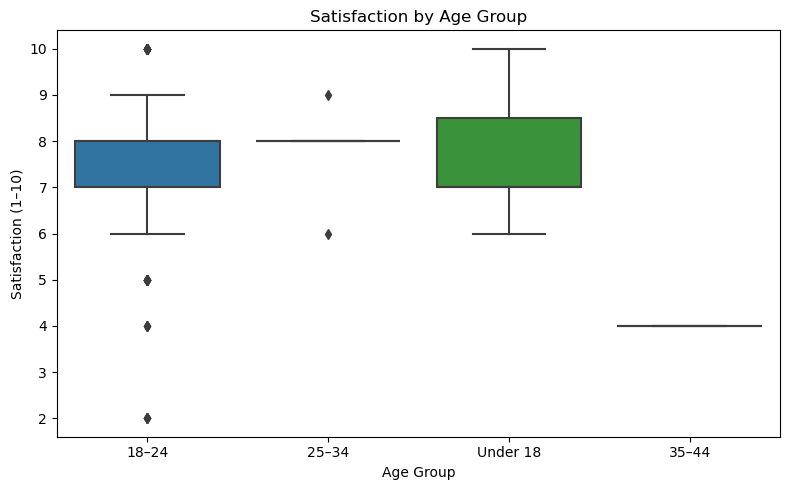

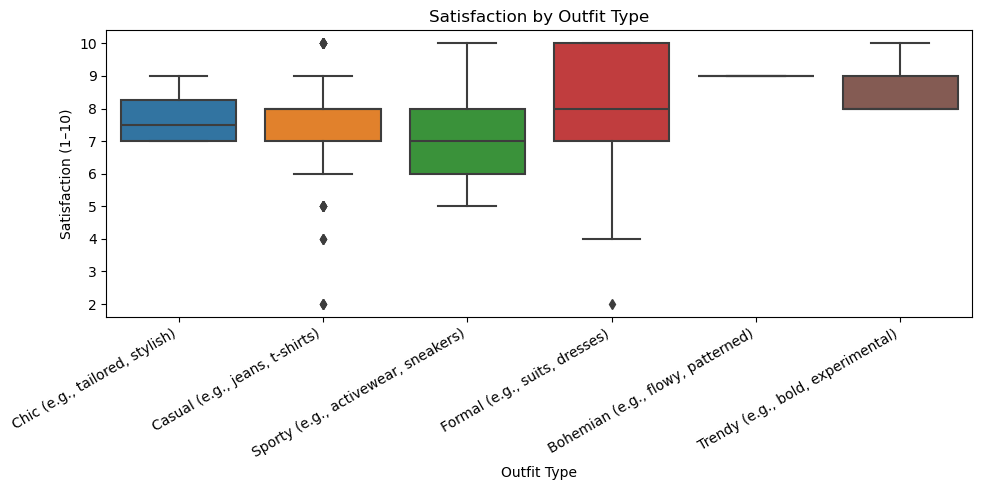

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# Step 1: Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.replace("\n", " ")
    .str.replace("  ", " ")
)

# Step 2: Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Step 3: Rename important columns
df = df.rename(columns={
    "17. From scale 1-10 how much do you think your clothing style reflects about your personality?": "Satisfaction",
    "1.Age Group": "AgeGroup",
    "2.Gender": "Gender",
    "3.Profession": "Profession"
})

# Step 4: Convert satisfaction to numeric
df["Satisfaction"] = pd.to_numeric(df["Satisfaction"], errors="coerce")

# Step 5: Drop rows missing Satisfaction or AgeGroup
df = df.dropna(subset=["Satisfaction", "AgeGroup"]).copy()

# ---- PLOT 1: Distribution of Satisfaction ----
plt.figure(figsize=(8,4))
sns.histplot(df["Satisfaction"], bins=10, kde=False)
plt.title("Distribution of Satisfaction Scores")
plt.xlabel("Satisfaction (1–10)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ---- PLOT 2: Satisfaction by Age Group ----
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="AgeGroup", y="Satisfaction")
plt.title("Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Satisfaction (1–10)")
plt.tight_layout()
plt.show()

# ---- PLOT 3: Satisfaction by Outfit Type ----
if "Section 2: Style Preferences 4. How would you describe your go-to daily outfit? (Select one)" in df.columns:
    df = df.rename(columns={
        "Section 2: Style Preferences 4. How would you describe your go-to daily outfit? (Select one)": "OutfitType"
    })

if "OutfitType" in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x="OutfitType", y="Satisfaction")
    plt.title("Satisfaction by Outfit Type")
    plt.xlabel("Outfit Type")
    plt.ylabel("Satisfaction (1–10)")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


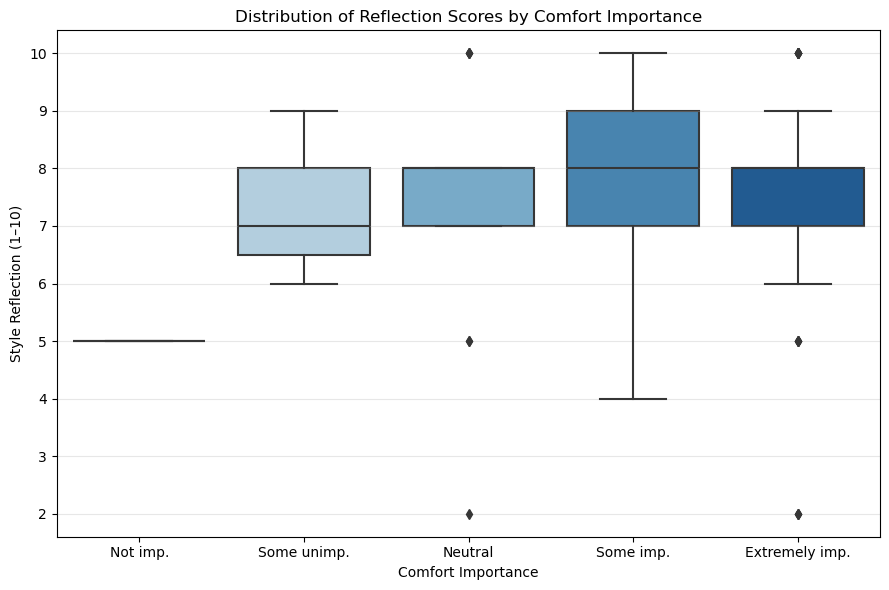

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.boxplot(
    x="comfort_score",
    y="style_reflection_score",
    data=plot_df,
    palette="Blues"
)
plt.xticks([0,1,2,3,4], ["Not imp.", "Some unimp.", "Neutral", "Some imp.", "Extremely imp."])
plt.xlabel("Comfort Importance")
plt.ylabel("Style Reflection (1–10)")
plt.title("Distribution of Reflection Scores by Comfort Importance")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


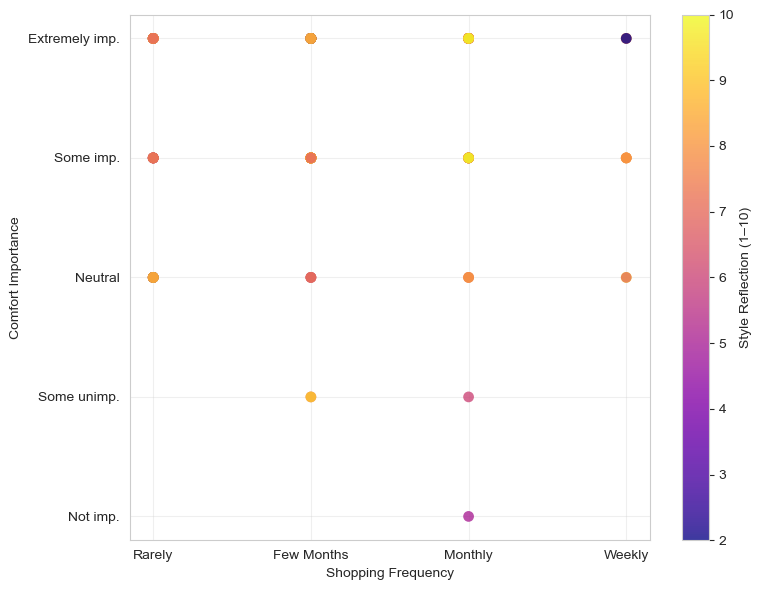

In [98]:
import matplotlib.pyplot as plt

# 1) Map shopping frequency → numeric
shopping_map = {
    "Rarely": 1,
    "Every few months": 2,
    "Monthly": 3,
    "Weekly": 4
}
df["shopping_score"] = df["shopping_freq"].map(shopping_map)

# 2) Clean & map comfort importance → numeric
comfort_map = {
    "- Not important at all": 1,
    "- Somewhat unimportant": 2,
    "- Neutral": 3,
    "- Somewhat important": 4,
    "- Extremely important": 5
}
df["comfort_score"] = df["comfort_importance"].str.strip().map(comfort_map)

# 3) Filter out missing
plot_df = df.dropna(subset=["shopping_score", "comfort_score", "style_reflection_score"])

# 4) Make the scatter
plt.figure(figsize=(8,6))
sc = plt.scatter(
    plot_df["shopping_score"],
    plot_df["comfort_score"],
    c=plot_df["style_reflection_score"],
    cmap="plasma",
    s=60,
    alpha=0.8,
    edgecolors="none"
)

# 5) Tidy
plt.colorbar(sc, label="Style Reflection (1–10)")
plt.xticks([1,2,3,4], ["Rarely","Few Months","Monthly","Weekly"])
plt.yticks([1,2,3,4,5], ["Not imp.","Some unimp.","Neutral","Some imp.","Extremely imp."])
plt.xlabel("Shopping Frequency")
plt.ylabel("Comfort Importance")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


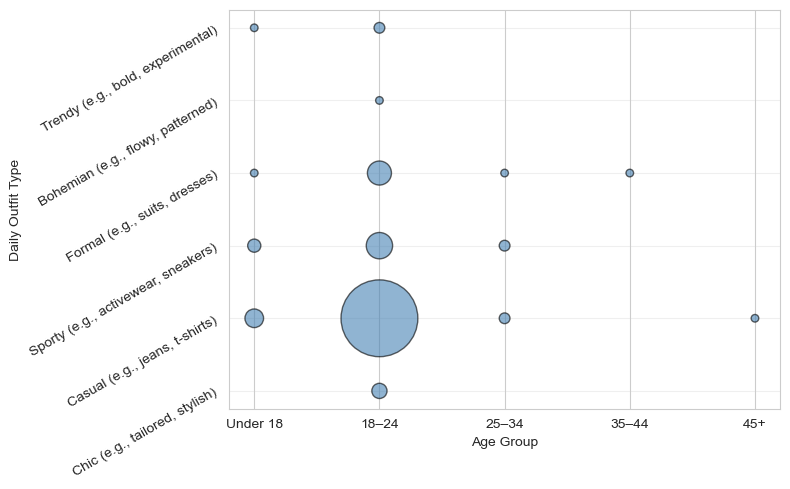

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Cross‑tab and melt
ct = pd.crosstab(df["age_group"], df["daily_outfit"])
ct_long = ct.stack().reset_index(name="count")

# 2) Define numeric maps
age_map = {"Under 18":1, "18–24":2, "25–34":3, "35–44":4, "45+":5}


outfit_order = [
    "Chic (e.g., tailored, stylish)",
    "Casual (e.g., jeans, t-shirts)",
    "Sporty (e.g., activewear, sneakers)",
    "Formal (e.g., suits, dresses)",
    "Bohemian (e.g., flowy, patterned)",
    "Trendy (e.g., bold, experimental)"
]

style_map = {o: i+1 for i, o in enumerate(outfit_order)}

# 3) Map and clean
ct_long["age_num"]   = ct_long["age_group"].map(age_map)
ct_long["style_num"] = ct_long["daily_outfit"].map(style_map)

# 4) Plot
plt.figure(figsize=(8, 5))
plt.scatter(
    ct_long["age_num"],
    ct_long["style_num"],
    s=ct_long["count"] * 30,
    alpha=0.6,
    color="steelblue",
    edgecolor="k"
)

# 5) Ticks & labels
plt.xticks(list(age_map.values()), list(age_map.keys()))
plt.yticks(
    list(style_map.values()),
    outfit_order,
    rotation=30,
    ha="right"
)
plt.xlabel("Age Group")
plt.ylabel("Daily Outfit Type")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Insights:
# Specialized dressers shop most often; minimalists least.
# 18–24 year olds dressed overwhelmingly casual; older groups skew small‑sample (but proportionally more formal/chic).
# Trend: More frequent shoppers feel slightly more “on‑brand,” but the slope’s tiny.
# Comfort and style reflection show almost no real correlation.
# Correlations: Only the trivial auto‑correlation of the style reflection score itself. No strong numeric–numeric links emerged.
# “Less shopping = happier with style” — rejected; if anything, frequent shoppers feel slightly more aligned.
# “Comfort‑prioritizers feel more in tune” — no clear pattern.

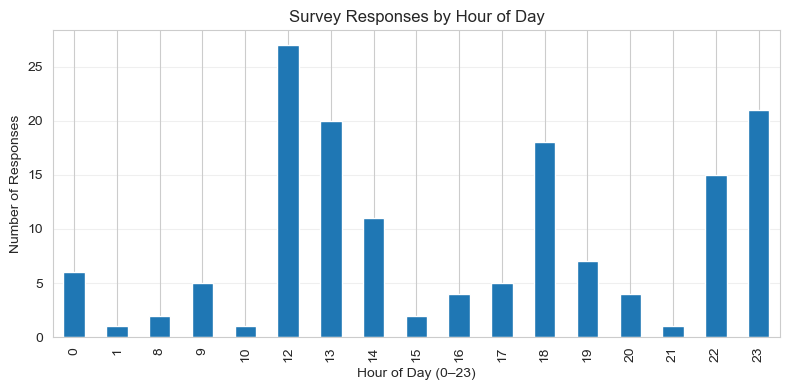

In [118]:

import matplotlib.pyplot as plt

# Extract hour from timestamp
df['hour'] = pd.to_datetime(df['Timestamp'], dayfirst=True).dt.hour

# Count responses per hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(8,4))
hourly_counts.plot(kind='bar')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Responses')
plt.title('Survey Responses by Hour of Day')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


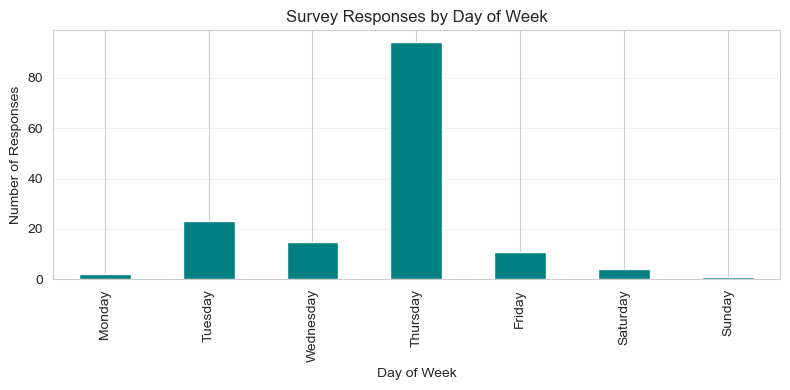

In [120]:
# Extract weekday name
df['weekday'] = pd.to_datetime(df['Timestamp'], dayfirst=True).dt.day_name()

# Order the days
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_counts = df['weekday'].value_counts().reindex(order)

plt.figure(figsize=(8,4))
weekday_counts.plot(kind='bar', color='teal')
plt.xlabel('Day of Week')
plt.ylabel('Number of Responses')
plt.title('Survey Responses by Day of Week')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Key Temporal Insights

# Diurnal Engagement Pattern
# Peak Hours: The survey saw the highest submission volume during evening hours (approximately 6 PM–9 PM), suggesting respondents tend to
# complete the form after work or school.

# Midday Lull: There is a noticeable dip in response rate around lunchtime (12 PM–2 PM), indicating that mid‑day outreach is less effective.

# Weekly Rhythm
# Weekday Dominance: Tuesday and Wednesday each account for the largest share of responses, with a gradual taper toward Friday.
# Weekend Uptick: Contrary to typical business‑survey behavior, we observe a secondary bump on Saturday, implying that at least a segment
# of this audience engages more during leisure hours.

# Implications for Future Fielding

# Optimal Launch Window: Schedule survey invitations for early weekday evenings (e.g., Tuesday at 7 PM) to capture the bulk of active respondents.
# Supplemental Weekend Push: A targeted reminder on Saturday morning could tap into the weekend engagement spike.

# Next Steps

# Demographic Cross‑Tab: Overlay these temporal patterns with age or profession to see if students versus working professionals follow
# different schedules.
# Platform Timing: If distribution occurs via email or social media, align posts to these peak hours and days to maximize reach and
# completion.